In [268]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fc-cache: succeeded


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회

/content/drive/MyDrive/2022/dacon/구내식당식수인원예측경진대회


In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns
import datetime

In [5]:
plt.rc('font', family='NanumBarunGothic') 

In [6]:
train = pd.read_csv("data/train.csv")
humidity = pd.read_csv("humidity_jinju(최종수정).csv")
weather = pd.read_csv("weather_jinju(최종수정).csv")

### 데이터 전처리

In [ ]:
# str -> datetime 타입 변환 및 새 변수 추가
train['일자'] = pd.to_datetime(train['일자'], format='%Y-%m-%d')
train['년도'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년도,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2


### EDA

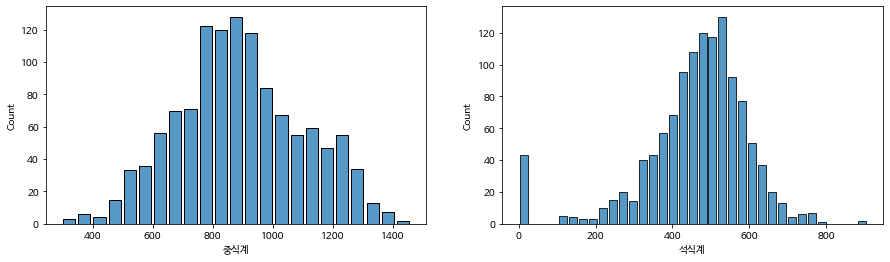

In [7]:
# 석식계와 중식계 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
sns.histplot(data=train, x='중식계', shrink=.8, ax=ax[0])
sns.histplot(data=train, x='석식계', shrink=.8, ax=ax[1])

- 석식이 0인 날 ?

#### 일자 별 석식과 중식 

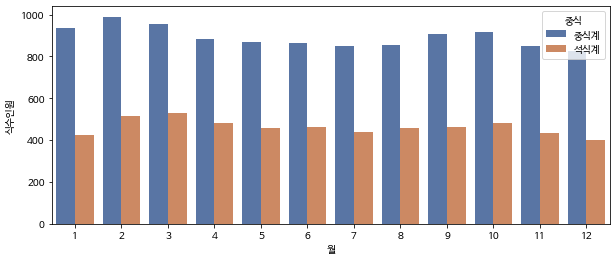

In [ ]:
# 월 별 식수 인원
fig = plt.subplots(figsize = (10, 4))
year = train.groupby('월').mean()[['중식계','석식계']].reset_index()
year = year.melt(id_vars=['월'], var_name="중식", value_name="식수인원")
sns.barplot(data=year, x='월', y='식수인원', hue='중식')

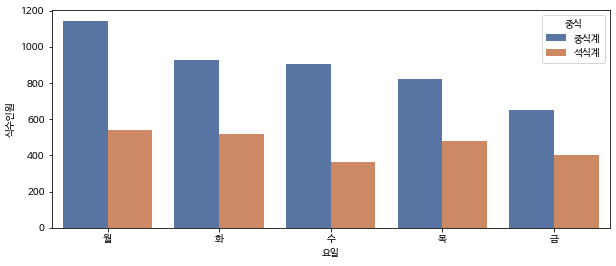

In [ ]:
# 요일 별 식수 인원
fig = plt.subplots(figsize = (10, 4))
days = train.groupby('요일').mean()[['중식계','석식계']].reset_index()
days = days.melt(id_vars=['요일'], var_name="중식", value_name="식수인원")
sns.barplot(data=days, x='요일', y='식수인원', hue='중식', order=['월','화','수','목','금'])

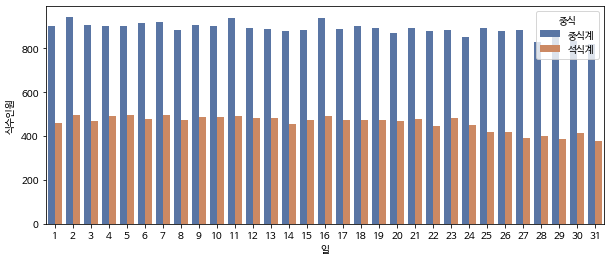

In [ ]:
# 일 별 식수 인원
fig = plt.subplots(figsize = (10, 4))
day = train.groupby('일').mean()[['중식계','석식계']].reset_index()
day = day.melt(id_vars=['일'], var_name="중식", value_name="식수인원")
sns.barplot(data=day, x='일', y='식수인원', hue='중식')

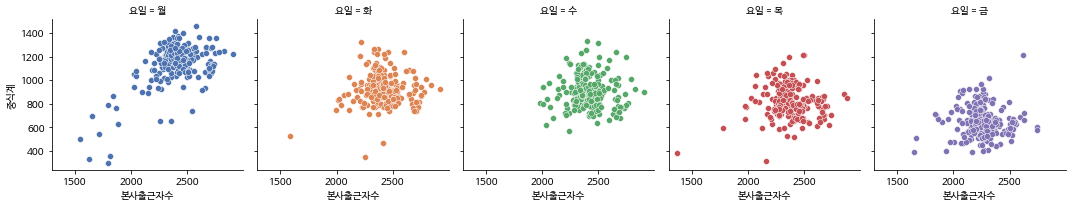

In [ ]:
# 요일별 출근자 수와 중식계 scatterplot
grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
grid.map(sns.scatterplot, '본사출근자수', '중식계')

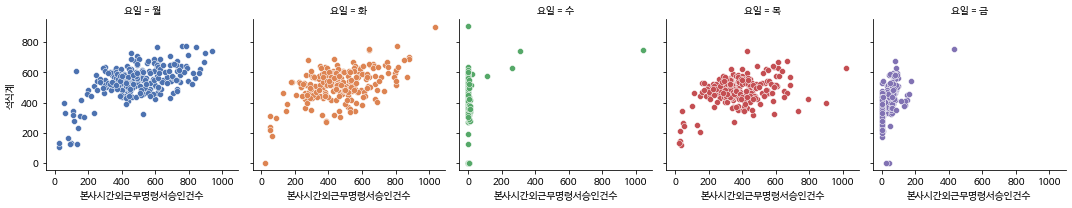

In [ ]:
# 요일별 야근자수와 석식계의 scatterplot
grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
grid.map(sns.scatterplot, '본사시간외근무명령서승인건수', '석식계')

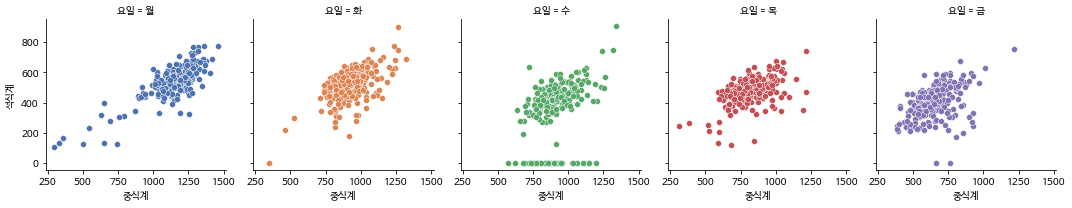

In [ ]:
# 요일별 중식계와 석식계의 scatterplot
grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
grid.map(sns.scatterplot, '중식계', '석식계')

- 중식 > 석식
- 중식: 월-금 순서로 작아진다
- 석식: 수요일 석식이 적다
- 년, 월, 일은 큰 연관성이 안보인다

In [ ]:
train[train['석식계']== 0]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년도,월,일
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2016,11,30
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2016,12,28
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2017,1,25
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0,2017,2,22
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0,2017,3,22
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0,2017,4,26
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0,2017,5,31
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0,2017,6,28
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0,2017,7,26
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0,2017,9,1


- 매월 마지막 주 수요일은 자기 계발의 날로 석식이 없다
- 석식 메뉴는 있지만 석식 인원이 없는 날: 역시 매월 마지막 주 수요일(석식 정보의 문제)

#### 본사출근자수와 식수 인원수 비율

In [ ]:
train['본사출근자수'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] -  train['현본사소속재택근무자수']

In [ ]:
print('중식: ', (train['중식계']/train['본사출근자수']).mean())
print('석식: ', (train['석식계']/train['본사출근자수']).mean())

중식:  0.3764582542741491
석식:  0.19545991505965818


- 실출근자의 38%가 중식을 19%가 석식을 먹는다

#### 자주 나오는 메뉴와 인기 많은 **메뉴**

In [ ]:
train2 = train[:]

lunch = []
dinner = []

for i in range(len(train2)):
    menu1 = train2['중식메뉴'][i]
    tmp1 = menu1.split(' ') # 공백으로 문자열 구분 
    tmp1 = ' '.join(tmp1).split()    # 빈 원소 삭제

    menu2 = train2['석식메뉴'][i]
    tmp2 = menu2.split(' ') # 공백으로 문자열 구분 
    tmp2 = ' '.join(tmp2).split()    # 빈 원소 삭제

    word1 = [word for word in tmp1 if not word.startswith('(') and not word.endswith(')')]
    word2 = [word for word in tmp2 if not word.startswith('(') and not word.endswith(')')]

    lunch.append(word1)
    dinner.append(word2)

In [ ]:
for l in lunch:
  index1, index2 = 0, 0
  if len(l) == 8:
    for a in range(len(l)):
      if l[a].endswith('/'): # 쌀밥/ 잡곡밥 같은 메뉴: / 사이에 공백이 들어가 각 각의 메뉴로 인식됨을 해결(일부 오타인 듯)
        l[a] = l[a] + l[a+1]
        index1 = a+1
      
      if l[a].endswith('의'):  # 이연복의 청경채찜: 하나의 메뉴지만 사이에 공백이 들어가 각 각의 메뉴로 인식됨을 해결
        l[a] = l[a] + l[a+1]
        index2 = a+1

    if index1 != 0:
      del l[index1]

    if index2 != 0:
      del l[index2]
    
    print(l)

['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새우튀김', '참나물땅콩가루무침', '청포도', '열무김치']
['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러드', '양배추,케일*우렁쌈장', '식혜', '깍두기']
['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이', '가지나물무침', '오미자주스', '배추겉절이']
['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈제샐러드', '두릅새송이초무침', '자몽에이드', '알타리김치']
['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐러드', '문어오이미역초무침', '요거트드링킹', '포기김치']
['쌀밥/곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채', '삼색물만두무침', '겉절이김치/양념장', '견과류샐러드*요거트D']
['쌀밥/흑미밥/찰현미밥', '팽이된장국', '오징어볶음', '고기완자전*케찹', '이연복의청경채찜', '포기김치', '양상추샐러드*키위D']


In [ ]:
for d in dinner:
  index1, index2 = 0, 0
  if len(d) == 7:
    for a in range(len(d)):
      if d[a].startswith('*'): # 꿔바로우탕수육* 소스: / 사이에 공백이 들어가 각 각의 메뉴로 인식됨을 해결
        d[a-1] = d[a-1]+d[a]
        index1 = a
      if d[a].endswith('/'): # 쌀밥/ 잡곡밥 같은 메뉴: / 사이에 공백이 들어가 각 각의 메뉴로 인식됨을 해결(일부 오타인 듯)
        d[a] = d[a] + d[a+1]
        index2 = a+1

    if index1 != 0:
      del d[index1]

    if index2 != 0:
      del d[index2]
    
    print(d)

['참치주먹밥', '김치우동', '쇠고기퀘사디아', '구운채소*발사믹소스', '과일', '알타리김치']
['쌀밥/잡곡밥', '열무된장국', '돼지갈비찜', '오징어브로컬리*초장', '취나물', '포기김치']
['쌀밥/잡곡밥', '차돌박이찌개', '치킨텐더', '꽃맛살볶음', '비름나물*천도복숭아', '포기김치']
['쌀밥/잡곡밥', '옛날돈까스', '브로컬리크림스프', '키위드레싱샐러드', '고구마범벅/무피클', '음료', '포기김치']
['닭갈비볶음밥', '가쯔오장국', '크림카레우동', '감자만두/샐러드*흑임자드레싱', '비트무생채', '포기김치']
['볶음밥/짜장소스', '맑은국', '고추잡채*꽃빵', '컬리플라워샐러드*망고드레싱', '단무지', '포기김치']
['쌀밥/잡곡밥', '옛날돈까스', '미소장국', '딸기드레싱샐러드', '감자범벅/무피클', '주스', '포기김치']
['굴소스볶음밥', '토마토스파게티', '크림스프', '마늘빵/감자튀김', '수제오이피클', '요구르트', '포기김치']
['쌀밥/잡곡밥', '뼈감자탕', '해물파전', '고추,양파/쌈장', '부추생채', '귤', '석박지']
['쌀밥/잡곡밥', '두부미소된장국', '오리훈제마늘볶음', '무쌈깻잎', '코다리강정', '오이소박이', '포기김치']
['쌀밥/잡곡밥', '감자만두국', '꽃삼겹김치찜', '꿔바로우탕수육*소스', '해파리냉채', '토마토설탕절인', '깍두기']
['쌀밥/잡곡밥', '홍합무우국', '로제찜닭*마늘빵', '계란장조림', '숙주미나리무침', '연근흑임자샐러드', '배추김치']
['쌀밥/잡곡밥', '다슬기아욱국', '갈릭파닭', '돈채호박볶음', '짠지오이무침', '요구르트', '포기김치']
['땡초주먹밥', '근대두부된장국', '치킨텐더', '루꼴라샐러드', '쫑상추새콤무침', '망고주스', '포기김치']
['김치볶음밥', '유부된장국', '새우로제파스타', '계란후라이', '취나물무침', '요구르트', '포기김치']
['쌀밥/잡곡밥', '전주식콩나물국*도시락김

In [ ]:
for d in dinner:
  index = 0
  if len(d) == 8:
    for a in range(len(d)):
      if d[a].endswith('의'): # 백종원의 고추짜장: 하나의 메뉴지만 사이에 공백이 들어가 각 각의 메뉴로 인식됨을 해결
        d[a] = d[a] + d[a+1]
        index = a+1

    if index != 0:
      del d[index]
    print(d)

['작은밥', '백종원의고추짜장', '맑은국', '칠리베이비크랩', '시금치흑임자샐러드', '단무지', '포기김치']


In [ ]:
bob=[]
soup=[]
main=[]

for i in range(len(train2)):
    if lunch[i][0]:
        bob.append(lunch[i][0])
    if lunch[i][1]:
        soup.append(lunch[i][1])
    if lunch[i][2]:
        main.append(lunch[i][2])

In [ ]:
print(f'bob: {len(bob)} / soup: {len(soup)} / main: {len(main)} / df: {len(train2)}') # 모두 잘 들어감

bob: 1205 / soup: 1205 / main: 1205 / df: 1205


In [ ]:
train2['l_bob'] = bob
train2['l_soup'] = soup
train2['l_main'] = main

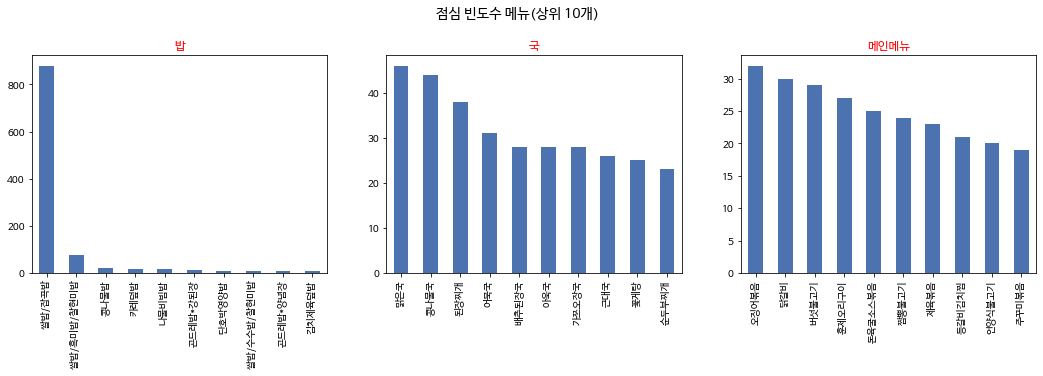

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
fig.suptitle('점심 빈도수 메뉴(상위 10개)', fontsize=14, position = (0.5, 1.0+0.05))
ax[0].set_title('밥', color='red')
train2['l_bob'].value_counts()[:10].plot(kind='bar', ax = ax[0])
ax[1].set_title('국', color='red')
train2['l_soup'].value_counts()[:10].plot(kind='bar', ax = ax[1])
ax[2].set_title('메인메뉴', color='red')
train2['l_main'].value_counts()[:10].plot(kind='bar', ax = ax[2])

In [ ]:
bob=[]
soup=[]
main=[]

for word in  dinner:
    if len(word) <= 3:
        bob.append('None') #비어있으면 그 날짜자체가 없어질수있으므로 'None' 값으로 대체
        soup.append('None')
        main.append('None')

    else:
        bob.append(word[0])
        soup.append(word[1])
        main.append(word[2])

In [ ]:
print(f'bob: {len(bob)} / soup: {len(soup)} / main: {len(main)} / df: {len(train2)}') # 모두 잘 들어감

bob: 1205 / soup: 1205 / main: 1205 / df: 1205


In [ ]:
train2['d_bob'] = bob
train2['d_soup'] = soup
train2['d_main'] = main

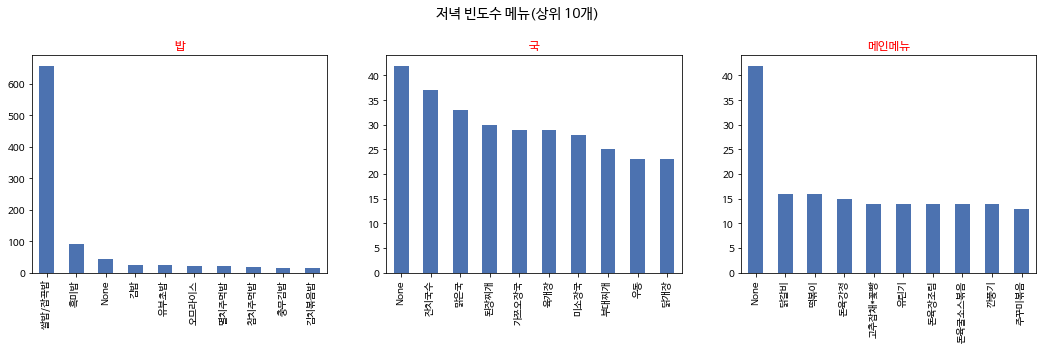

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 4))
fig.suptitle('저녁 빈도수 메뉴(상위 10개)', fontsize=14, position = (0.5, 1.0+0.05))
ax[0].set_title('밥', color='red')
train2['d_bob'].value_counts()[:10].plot(kind='bar', ax = ax[0])
ax[1].set_title('국', color='red')
train2['d_soup'].value_counts()[:10].plot(kind='bar', ax = ax[1])
ax[2].set_title('메인메뉴', color='red')
train2['d_main'].value_counts()[:10].plot(kind='bar', ax = ax[2])

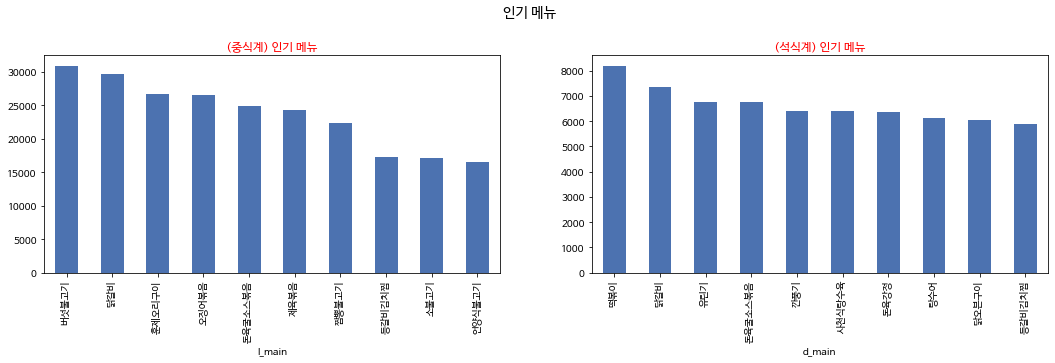

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
fig.suptitle('인기 메뉴', fontsize=14, position = (0.5, 1.0+0.05))
ax[0].set_title('(중식계) 인기 메뉴', color='red')
train2.groupby('l_main').sum()['중식계'].sort_values(ascending=False)[:10].plot(kind='bar',ax = ax[0])
ax[1].set_title('(석식계) 인기 메뉴', color='red')
train2.groupby('d_main').sum()['석식계'].sort_values(ascending=False)[:10].plot(kind='bar', ax = ax[1])

#### 공휴일

In [ ]:
train['공휴일전날']=0

train['공휴일전날'][4]=1 #'16 설연휴
train['공휴일전날'][17]=1 #삼일절
train['공휴일전날'][47]=1 #국회의원 선거
train['공휴일전날'][62]=1 #어린이날
train['공휴일전날'][67]=1 #석가탄신일
train['공휴일전날'][152]=1 #추석연휴
train['공휴일전날'][245]=1 #'17 설연휴
train['공휴일전날'][264]=1 #'17 삼일절
train['공휴일전날'][309]=1 # 석가탄신일
train['공휴일전날'][310]=1 #'17 어린이날
train['공휴일전날'][330]=1 #'17 현충일
train['공휴일전날'][379]=1 #'17 광복절
train['공휴일전날'][502]=1 #'18 설연휴
train['공휴일전날'][510]=1 #'18 삼일절
train['공휴일전날'][552]=1 #'18 근로자의 날
train['공휴일전날'][555]=1 #'18 어린이날
train['공휴일전날'][565]=1 #'18 석가탄신일
train['공휴일전날'][575]=1 #'18 현충일
train['공휴일전날'][579]=1 #'18 지방선거
train['공휴일전날'][623]=1 #'18 광복절
train['공휴일전날'][650]=1 #'18 추석연휴
train['공휴일전날'][651]=1 #'18 한글날
train['공휴일전날'][705]=1 #'18 성탄절
train['공휴일전날'][709]=1 #'19 신정
train['공휴일전날'][732]=1 #'19 설연휴
train['공휴일전날'][748]=1 #'19 삼일절
train['공휴일전날'][790]=1 #'19 근로자의 날
train['공휴일전날'][814]=1 #'19 현충일
train['공휴일전날'][863]=1 #'19 광복절
train['공휴일전날'][882]=1 #'19 추석연휴
train['공휴일전날'][894]=1 #'19 개천절
train['공휴일전날'][897]=1 #'19 한글날
train['공휴일전날'][951]=1 #'19 성탄절
train['공휴일전날'][955]=1 #'20 신정
train['공휴일전날'][971]=1 #'20 설연휴
train['공휴일전날'][995]=1 #'20 삼일절
train['공휴일전날'][1027]=1 #'20 국회의원선거
train['공휴일전날'][1037]=1 #'20 석가탄신일
train['공휴일전날'][1038]=1 #'20 어린이날
train['공휴일전날'][1061]=1 #'20 현충일
train['공휴일전날'][1099]=1 #'20 광복절
train['공휴일전날'][1129]=1 #'20 추석연휴
train['공휴일전날'][1133]=1 #'20 한글날
train['공휴일전날'][1187]=1 #'20 성탄절

train['공휴일전날'][1215]=1 #'21 설연휴
train['공휴일전날'][1225]=1 #'21 삼일절

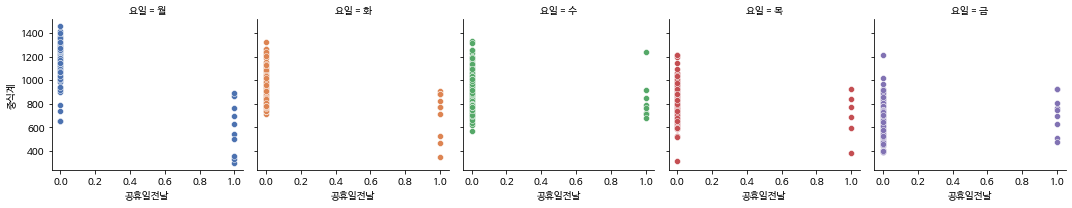

In [ ]:
#공휴일 전날과 중식계의 scatterplot
grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
grid.map(sns.scatterplot, '공휴일전날', '중식계')

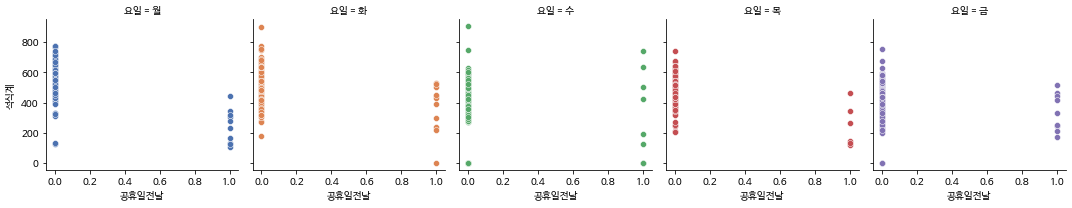

In [ ]:
#공휴일 전날과 석식계의 scatterplot
grid = sns.FacetGrid(data=train, col='요일', hue = '요일')
grid.map(sns.scatterplot, '공휴일전날', '석식계')

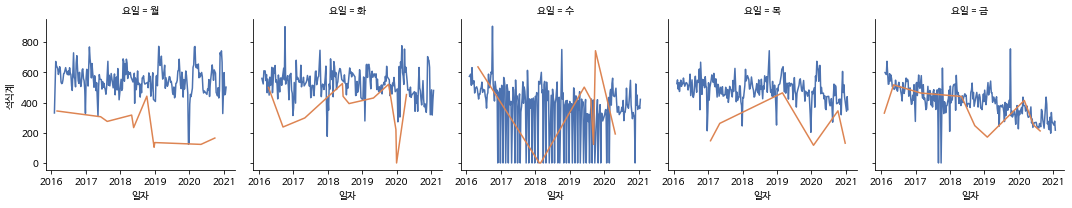

In [ ]:
# 공휴일 전날과 석식계 plot
grid = sns.FacetGrid(data=train, col='요일', hue = '공휴일전날')
grid.map(plt.plot, '일자', '석식계')

#### 날씨

In [ ]:
train.rename(columns={'일자' : 'date'}, inplace=True)

merge_weather = pd.merge(left = weather, right = humidity, on = "date", how = 'inner') # 습도와 온도 테이블 date을 기준으로 조인
merge_weather['date'] = pd.to_datetime(merge_weather['date'], format='%Y-%m-%d')

merge_weather = merge_weather.drop(['Unnamed: 0_y','Unnamed: 0_x'], axis=1) 
train_weather = pd.merge(left = train, right=merge_weather, on="date", how='inner') # 날씨 테이블과 train 테이블 date을 기준으로 조인

In [ ]:
train_weather.head()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2016,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2016,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,2016,2,3,2365.0,0,-1.7,7.7,-9.3,0.0,57.1
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,2016,2,4,2277.0,0,-0.2,7.7,-7.7,0.0,53.4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,2016,2,5,2142.0,1,1.3,9.6,-6.5,0.0,44.4


In [ ]:
# 누락없이 join 완료
print(train_weather['date'].dt.month.unique())
print(train_weather['월'].unique())

[ 2  3  4  5  6  7  8  9 10 11 12  1]
[ 2  3  4  5  6  7  8  9 10 11 12  1]


In [ ]:
# 누락없이 join 완료
print(train_weather.shape)
print(train.shape)

(1205, 22)
(1205, 17)


In [ ]:
# 누락없이 join 완료
print(train_weather.shape)
print(train.shape)

(1205, 22)
(1205, 17)


In [ ]:
# 결측치 존재
train_weather[train_weather['humidity']=='\xa0'] 

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
659,2018-10-19,금,2805,207,303,40,0.0,모닝롤/사과파이 우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 올갱이아욱국...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 닭갈비 연두부*양념장 호박나물 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 닭곰탕 류산슬 비엔나감자구이 아삭고추무침 포기김치...,...,2018,10,19,2295.0,0,NaN,20.8,5.4,0.0,


In [ ]:
# 10/19을 기준으로 하루 전날 값으로 결측치 대체
train_weather['humidity'] = train_weather['humidity'].replace('\xa0', None)
train_weather[train_weather['date']=='2018-10-19']['humidity'] = train_weather[train_weather['date']=='2018-10-18']['humidity']

In [ ]:
train_weather[train_weather['date']=='2018-10-19']

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity
659,2018-10-19,금,2805,207,303,40,0.0,모닝롤/사과파이 우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 올갱이아욱국...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 닭갈비 연두부*양념장 호박나물 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 닭곰탕 류산슬 비엔나감자구이 아삭고추무침 포기김치...,...,2018,10,19,2295.0,0,NaN,20.8,5.4,0.0,60.8


In [ ]:
# str -> float: type 변환
train_weather = train_weather.astype({'avg':'float'})
train_weather = train_weather.astype({'min':'float'})
train_weather = train_weather.astype({'max':'float'})
train_weather = train_weather.astype({'humidity':'float'})

# 결측치 확인
train_weather.isnull().sum()

date              0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
년도                0
월                 0
일                 0
본사출근자수            0
공휴일전날             0
avg               1
max               0
min               0
rain              0
humidity          0
dtype: int64

In [ ]:
# 불쾌지수라는 새로운 변수 추가
train_weather["discomfort"]=(0.81*train_weather['avg'])+(0.01*train_weather['humidity']*(0.99*(train_weather['avg']-14.3))) + 46.3
train_weather.head(2)

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity,discomfort
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9,39.338311
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5,36.630850


In [ ]:
# 시각화를 위한 데이터 구조 변환
tw = train_weather[['avg','max','min','rain','humidity','discomfort','중식계','석식계']]
tw2 =tw.melt(id_vars=['avg','max','min','rain','humidity','discomfort'], var_name="중석식", value_name="식수인원")
tw2

,avg,max,min,rain,humidity,discomfort,중석식,식수인원
0,-0.6,5.0,-4.1,0.0,43.9,39.338311,중식계,1039.0
1,-2.3,6.2,-9.1,0.0,47.5,36.630850,중식계,867.0
2,-1.7,7.7,-9.3,0.0,57.1,35.878360,중식계,1017.0
3,-0.2,7.7,-7.7,0.0,53.4,38.472430,중식계,978.0
4,1.3,9.6,-6.5,0.0,44.4,41.638720,중식계,925.0
...,...,...,...,...,...,...,...,...
2405,-0.4,10.6,-9.7,0.0,64.0,36.662080,석식계,421.0
2406,5.2,12.6,-2.6,1.7,77.8,43.502998,석식계,353.0
2407,7.0,9.8,5.1,1.2,97.5,44.923675,석식계,217.0
2408,6.3,14.3,-1.2,0.0,75.8,45.399640,석식계,502.0


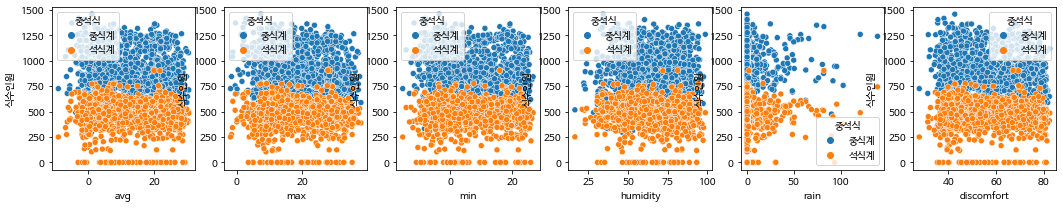

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize = (18, 3))
sns.scatterplot(data=tw2, x='avg' , y="식수인원", hue='중석식', ax=ax[0])
sns.scatterplot(data=tw2, x='max' , y="식수인원", hue='중석식', ax=ax[1])
sns.scatterplot(data=tw2, x='min' , y="식수인원", hue='중석식', ax=ax[2])
sns.scatterplot(data=tw2, x='humidity' , y="식수인원", hue='중석식', ax=ax[3])
sns.scatterplot(data=tw2, x='rain' , y="식수인원", hue='중석식', ax=ax[4])
sns.scatterplot(data=tw2, x='discomfort' , y="식수인원", hue='중석식', ax=ax[5])

### 가설검증

#### 공휴일 - 식수 인원수

In [ ]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
data_not_holiday=train[train['공휴일전날']==0]
data_holiday=train[train['공휴일전날']==1]

In [ ]:
len(data_holiday)

44

In [ ]:
# 결측치 평균값으로 대체
data_holiday['석식계']=data_holiday['석식계'].fillna(data_holiday['석식계'].mean())
data_holiday['중식계']=data_holiday['중식계'].fillna(data_holiday['중식계'].mean())
data_not_holiday['석식계']=data_not_holiday['석식계'].fillna(data_not_holiday['석식계'].mean())
data_not_holiday['중식계']=data_not_holiday['중식계'].fillna(data_not_holiday['중식계'].mean())

In [ ]:
print("---중식계---")
print("공휴일: ",data_holiday['중식계'].mean())
print("비공휴일: ",data_not_holiday['중식계'].mean())
print("---석식계---")
print("공휴일: ",data_holiday['석식계'].mean())
print("비공휴일: ",data_not_holiday['석식계'].mean())

---중식계---
공휴일:  708.8409090909091
비공휴일:  897.2127476313523
---석식계---
공휴일:  308.95454545454544
비공휴일:  467.5641688199828


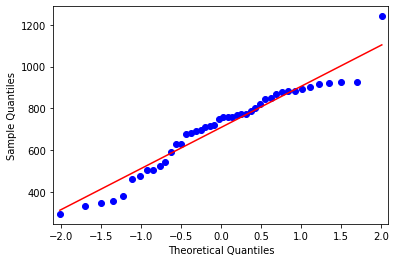

In [ ]:
qqplot(data_holiday['중식계'], line='s')
plt.show()

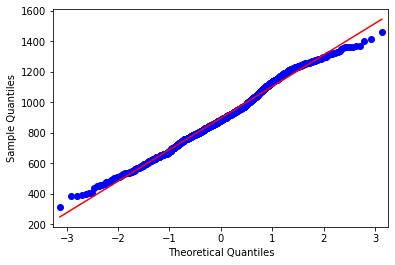

In [ ]:
qqplot(data_not_holiday['중식계'], line='s')
plt.show()

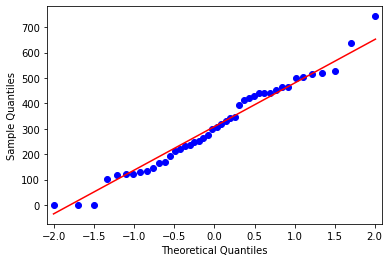

In [217]:
qqplot(data_holiday['석식계'], line='s')
plt.show()

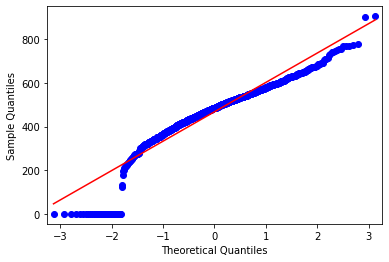

In [218]:
qqplot(data_not_holiday['석식계'], line='s')
plt.show()

In [219]:
# 정규성 검증
from scipy.stats import shapiro
print("[중식계]")
print(shapiro(data_holiday['중식계']))
print(shapiro(data_not_holiday['중식계'])) #정규성 안보임 #n이 작아서?

print("[석식계]")
print(shapiro(data_holiday['석식계'])) 
print(shapiro(data_not_holiday['석식계'])) #정규성 안보임

[중식계]
ShapiroResult(statistic=0.9511656165122986, pvalue=0.0608031302690506)
ShapiroResult(statistic=0.9914745092391968, pvalue=2.953557668661233e-06)
[석식계]
ShapiroResult(statistic=0.9751590490341187, pvalue=0.45326003432273865)
ShapiroResult(statistic=0.9033500552177429, pvalue=1.8674431497616887e-26)


In [192]:
# Equal variance test
from scipy.stats import levene

print("[중식계]")
print(levene(data_holiday['중식계'], data_not_holiday['중식계']))
#H0: variance의 유의미한 차이가 없다. (variance가 같다.) / H1: variance가 다르다.
#pvalue=0.5116636909930873 로 0.05 보다 크기에 fail to reject H0, 즉 variance가 같다.

print("[석식계]")
print(levene(data_holiday['석식계'], data_not_holiday['석식계']))
#pvalue=0.0015226488487584404로 0.05 보다 작기에 reject H0, 즉 variace가 다르다

[중식계]
LeveneResult(statistic=0.5170148202657772, pvalue=0.47225750249019927)
[석식계]
LeveneResult(statistic=10.669850835588228, pvalue=0.0011196786405122728)


In [197]:
# t-test
print("[중식계]")
print(stats.ttest_ind(data_holiday['중식계'], data_not_holiday['중식계'],equal_var=True))
print("[석식계]")
print(stats.ttest_ind(data_holiday['석식계'], data_not_holiday['석식계'],equal_var=False))
#pvalue 0.05보다 작기에 reject H0, 즉 유의미한 차이를 지니고 있는 것으로 보인다.

[중식계]
Ttest_indResult(statistic=-5.936914314321667, pvalue=3.795160057157894e-09)
[석식계]
Ttest_indResult(statistic=-6.010487719903307, pvalue=3.0151284978630515e-07)


In [193]:
# t-test
print("[중식계]")
print(stats.ranksums(data_holiday['중식계'], data_not_holiday['중식계']))
print("[석식계]")
print(stats.ranksums(data_holiday['석식계'], data_not_holiday['석식계']))
#pvalue 0.05보다 작기에 reject H0, 즉 유의미한 차이를 지니고 있는 것으로 보인다.

[중식계]
RanksumsResult(statistic=-5.342435834841232, pvalue=9.170583758262859e-08)
[석식계]
RanksumsResult(statistic=-6.318903351122621, pvalue=2.6342595366851106e-10)


- H0: 공휴일과 석식계는 상관관계가 없다
- H1: 공휴일과 석식계는 상관관계가 있다
- p-value가 0.05보다 작기 때문에 H0를 기각하고  H1 채택
- 즉, 공휴일과 석식계는 상관관계가 있다
(보고서엔 이런 식으로 가설 세워서 써주세욤 >.<♥)

#### 불쾌 지수 - 식수 인원수

In [245]:
happy = train_weather[train_weather['discomfort']<68]
angry = train_weather[train_weather['discomfort']>=68]

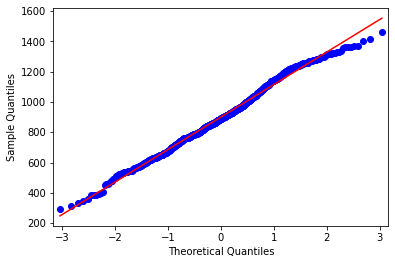

In [226]:
qqplot(happy['중식계'], line='s')
plt.show()

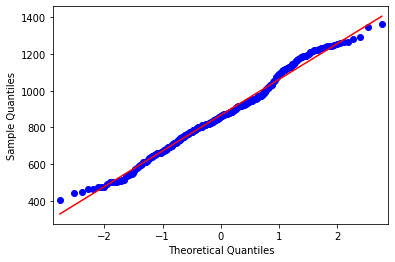

In [227]:
qqplot(angry['중식계'], line='s')
plt.show()

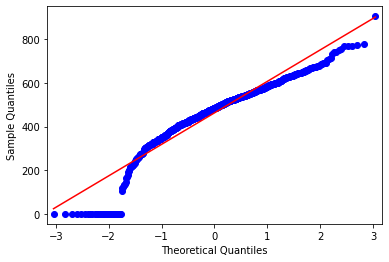

In [228]:
qqplot(happy['석식계'], line='s')
plt.show() # 아래결측치 제거하고 다시 그려야할 듯

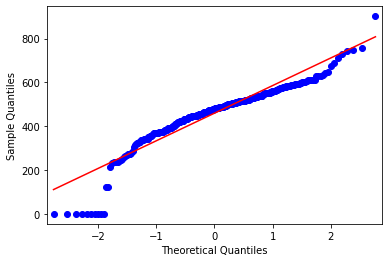

In [229]:
qqplot(angry['석식계'], line='s')
plt.show() # 아래결측치 제거하고 다시 그려야할 듯

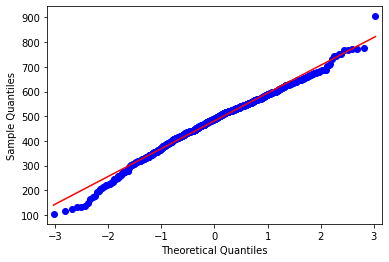

In [231]:
qqplot(happy[happy['석식계']>0.0]['석식계'], line='s')
plt.show()

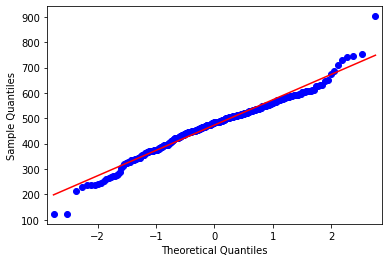

In [230]:
qqplot(angry[angry['석식계']>0.0]['석식계'], line='s')
plt.show()

In [251]:
angry = angry[angry['석식계']>0.0]

In [261]:
# 정규성 검증
from scipy.stats import shapiro
print("[중식계]")
print(shapiro(angry['중식계']))
print(shapiro(happy['중식계']))

print("[석식계]")
print(shapiro(angry['석식계']))
print(shapiro(happy['석식계']))
# qqpolt에선 정규성을 보이는 것 같은데 왜 ............... 일까요


[중식계]
ShapiroResult(statistic=0.9875646233558655, pvalue=0.00518338568508625)
ShapiroResult(statistic=0.9926901459693909, pvalue=0.0003288309380877763)
[석식계]
ShapiroResult(statistic=0.9771947860717773, pvalue=3.22920095641166e-05)
ShapiroResult(statistic=0.9120259284973145, pvalue=8.055289176813821e-22)


In [260]:
# 등분산 검정
from scipy.stats import levene
print("[중식계]")
print(levene(angry['중식계'],happy['중식계']))

print("[석식계]")
print(levene(angry['석식계'], happy['석식계']))

[중식계]
LeveneResult(statistic=4.962513760604113, pvalue=0.026088611601828182)
[석식계]
LeveneResult(statistic=22.204083847976303, pvalue=2.7398901502486968e-06)


In [262]:
# 등분산 검정
from scipy.stats import bartlett
print("[중식계]")
print(bartlett(angry['중식계'], happy['중식계']))
print("[석식계]")
print(bartlett(angry['석식계'], happy['석식계']))

[중식계]
BartlettResult(statistic=3.368793446208811, pvalue=0.06644239886324872)
[석식계]
BartlettResult(statistic=57.85627783385493, pvalue=2.8198560382694404e-14)


In [263]:
#t-test
print("[중식계]")
print(stats.ttest_ind(angry['중식계'], happy['중식계'],equal_var=False))
print("[석식계]")
print(stats.ttest_ind(angry['석식계'], happy['석식계'],equal_var=False))

[중식계]
Ttest_indResult(statistic=-2.3678726652655446, pvalue=0.0181718558649885)
[석식계]
Ttest_indResult(statistic=1.4434858074143049, pvalue=0.1492353197525187)


In [264]:
print("[중식계]")
print(stats.ranksums(angry['중식계'], happy['중식계'])) #pvalue 0.05보다 작기에 reject H0
print("[석식계]")
print(stats.ranksums(angry['석식계'], happy['석식계']))

[중식계]
RanksumsResult(statistic=-2.211438757440838, pvalue=0.027005468438985533)
[석식계]
RanksumsResult(statistic=-0.46677974024946417, pvalue=0.6406574722290337)


### 모델링

In [ ]:
# 메뉴는 모델링 작업을 위해 drop
df = train_weather.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1)

In [ ]:
# 결측치 확인
df.isnull().sum()

date              0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식계               0
석식계               0
년도                0
월                 0
일                 0
본사출근자수            0
공휴일전날             0
avg               1
max               0
min               0
rain              0
humidity          0
discomfort        1
dtype: int64

In [ ]:
# 전체 평균값으로 대체
df['avg']=df['avg'].fillna(df['avg'].mean())
df['discomfort']=df['discomfort'].fillna(df['discomfort'].mean())

In [ ]:
df.head()

,date,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,년도,월,일,본사출근자수,공휴일전날,avg,max,min,rain,humidity,discomfort
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2016,2,1,2401.0,0,-0.6,5.0,-4.1,0.0,43.9,39.338311
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2016,2,2,2378.0,0,-2.3,6.2,-9.1,0.0,47.5,36.630850
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2016,2,3,2365.0,0,-1.7,7.7,-9.3,0.0,57.1,35.878360
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2016,2,4,2277.0,0,-0.2,7.7,-7.7,0.0,53.4,38.472430
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2016,2,5,2142.0,1,1.3,9.6,-6.5,0.0,44.4,41.638720


In [ ]:
# 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환
from sklearn.preprocessing import LabelEncoder

df[df.columns[df.dtypes=='O']] = df[df.columns[df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

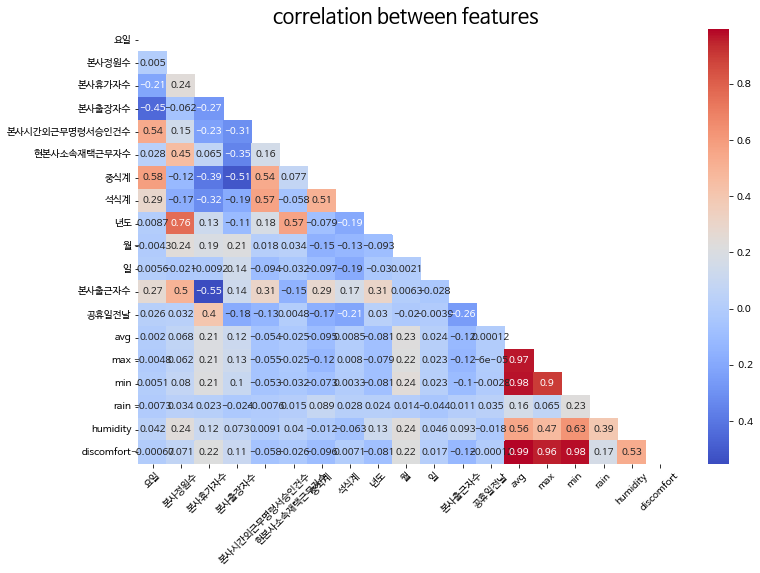

In [ ]:
#상관관계 분석도
plt.figure(figsize=(12,8))

heat_table = df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=20)
plt.show()

In [ ]:
df.corr().loc["중식계"].abs().sort_values(ascending=False)

중식계               1.000000
요일                0.584193
본사시간외근무명령서승인건수    0.535611
본사출장자수            0.512680
석식계               0.508287
본사휴가자수            0.391975
본사출근자수            0.286810
공휴일전날             0.168716
월                 0.154664
max               0.122591
본사정원수             0.115529
일                 0.097392
discomfort        0.095935
avg               0.094816
rain              0.088758
년도                0.078804
현본사소속재택근무자수       0.076509
min               0.072575
humidity          0.012055
Name: 중식계, dtype: float64

In [ ]:
df.corr().loc["석식계"].abs().sort_values(ascending=False)

석식계               1.000000
본사시간외근무명령서승인건수    0.571168
중식계               0.508287
본사휴가자수            0.316894
요일                0.292941
공휴일전날             0.213841
년도                0.194792
본사출장자수            0.188164
일                 0.185565
본사정원수             0.173852
본사출근자수            0.172373
월                 0.127142
humidity          0.063393
현본사소속재택근무자수       0.057534
rain              0.027613
avg               0.008469
max               0.008034
discomfort        0.007098
min               0.003260
Name: 석식계, dtype: float64

In [ ]:
df = df.drop(['humidity', 'min','avg', 'date'], axis=1)  # 최저온도는 상관관계가 거의 없고 # avg, humidity는 discomfort로 #date는 월, 요일, 년도

In [ ]:
X = df.drop(['석식계', '중식계'],axis=1)
y1 = df['중식계']
y2 = df['석식계']

In [114]:
test = pd.read_csv("data/test.csv")
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [105]:
#test 데이터셋에 맞는 날씨 데이터
T_humidity = pd.read_csv("humidity_test.csv") 
T_weather = pd.read_csv("weather_test.csv")

In [115]:
# str -> datetime 타입 변환 및 새 변수 추가
test['일자'] = pd.to_datetime(test['일자'], format='%Y-%m-%d')
test['년도'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day

test['공휴일전날']=0 # test 셋에 공휴일이 존재하지 않음
test['본사출근자수'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] -  test['현본사소속재택근무자수']

In [118]:
test.rename(columns={'일자' : 'date'}, inplace=True)

# str -> datetime 타입 변환 및 새 변수 추가

merge_weather = pd.merge(left = T_weather, right = T_humidity, on = "date", how = 'inner')  #습도와 온도 테이블 date을 기준으로 조인
merge_weather['date'] = pd.to_datetime(merge_weather['date'], format='%Y-%m-%d')

merge_weather = merge_weather.drop(['Unnamed: 0_y','Unnamed: 0_x'], axis=1)
test_weather = pd.merge(left = test, right=merge_weather, on="date", how='inner')  # test 데이터와 날씨 테이블 date을 기준으로 조인

In [123]:
# 불쾌지수 새 변수 추가
test_weather["discomfort"]=(0.81*test_weather['avg'])+(0.01*test_weather['humidity']*(0.99*(test_weather['avg']-14.3))) + 46.3

In [119]:
# 요일 라벨 인코딩
test_weather[test_weather.columns[test_weather.dtypes=='O']] = test_weather[test_weather.columns[test_weather.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [124]:
X_test =test_weather.drop(['humidity', 'min','avg', 'date','조식메뉴','중식메뉴','석식메뉴'], axis=1) 

In [ ]:
target =test_weather[X.columns]

In [ ]:
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [157]:
! pip install catboost

In [158]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### 중식계

In [182]:
# GradientBoostingRegressor

gbr_pred1 = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]

    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = gbr.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    gbr_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')

    
    fold_pred = gbr.predict(target) / 10
    gbr_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.8133342009081842

2 FOLD Training.....
2 FOLD R2 = 0.8084335596907107

3 FOLD Training.....
3 FOLD R2 = 0.8023772440616648

4 FOLD Training.....
4 FOLD R2 = 0.7504993278616343

5 FOLD Training.....
5 FOLD R2 = 0.8502494872209672

6 FOLD Training.....
6 FOLD R2 = 0.8722909681079271

7 FOLD Training.....
7 FOLD R2 = 0.811472435704828

8 FOLD Training.....
8 FOLD R2 = 0.8229874102111662

9 FOLD Training.....
9 FOLD R2 = 0.8484767742540932

10 FOLD Training.....
10 FOLD R2 = 0.8276342292483844

10FOLD Mean of R2 = 0.820775563726956 & std = 0.03148544791815908


In [183]:
# RandomForestRegressor
rf_pred1 = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = rf.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    rf_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7646467899426618

2 FOLD Training.....
2 FOLD R2 = 0.7659039117674242

3 FOLD Training.....
3 FOLD R2 = 0.7784236921828166

4 FOLD Training.....
4 FOLD R2 = 0.7619622300294246

5 FOLD Training.....
5 FOLD R2 = 0.8386725207776291

6 FOLD Training.....
6 FOLD R2 = 0.848814980507832

7 FOLD Training.....
7 FOLD R2 = 0.8000532405230563

8 FOLD Training.....
8 FOLD R2 = 0.7525164943094982

9 FOLD Training.....
9 FOLD R2 = 0.8382234936586894

10 FOLD Training.....
10 FOLD R2 = 0.8296878975093744

10FOLD Mean of R2 = 0.7978905251208406 & std = 0.03571534951993675


In [184]:
# CatBoostRegressor
cb_pred1 = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = cb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    cb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 164.1847500	test: 166.2075197	best: 166.2075197 (0)	total: 1.97ms	remaining: 5.9s
1000:	learn: 43.5317478	test: 65.8992146	best: 65.8992146 (1000)	total: 1.41s	remaining: 2.81s
2000:	learn: 36.6526072	test: 65.6997714	best: 65.6267451 (1879)	total: 3.48s	remaining: 1.74s
2999:	learn: 33.6889474	test: 65.5876295	best: 65.5445807 (2974)	total: 4.75s	remaining: 0us

bestTest = 65.54458074
bestIteration = 2974

Shrink model to first 2975 iterations.
1 FOLD R2 = 0.8203489786588212

2 FOLD Training.....
0:	learn: 165.3341227	test: 156.8958668	best: 156.8958668 (0)	total: 1.42ms	remaining: 4.25s
1000:	learn: 43.2664026	test: 66.2017214	best: 66.0226236 (875)	total: 1.45s	remaining: 2.9s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 66.02262356
bestIteration = 875

Shrink model to first 876 iterations.
2 FOLD R2 = 0.8068493615268653

3 FOLD Training.....
0:	learn: 164.4138275	test: 165.0261148	best: 165.0261148 (0)	total: 1.5ms	remaining: 4.5

In [161]:
! pip install ngboost

In [185]:
# NGBRegressor
from ngboost import NGBRegressor

ngb_pred1 = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y1)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y1.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y1.iloc[val_idx]
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = ngb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    ngb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred1 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.8067172550487398

2 FOLD Training.....
2 FOLD R2 = 0.8086028819410165

3 FOLD Training.....
3 FOLD R2 = 0.8046622992231365

4 FOLD Training.....
4 FOLD R2 = 0.7541094754481725

5 FOLD Training.....
5 FOLD R2 = 0.8575971797185774

6 FOLD Training.....
6 FOLD R2 = 0.8806274334553806

7 FOLD Training.....
7 FOLD R2 = 0.823072845479326

8 FOLD Training.....
8 FOLD R2 = 0.8255622930552089

9 FOLD Training.....
9 FOLD R2 = 0.8512753966611116

10 FOLD Training.....
10 FOLD R2 = 0.8361094380282199

10FOLD Mean of R2 = 0.824833649805889 & std = 0.03319151958454282


#### 석식계

In [186]:
#GradientBoostingRegressor

gbr_pred2 = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]

    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = gbr.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    gbr_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')

    fold_pred = gbr.predict(target) / 10
    gbr_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7313767918221143

2 FOLD Training.....
2 FOLD R2 = 0.680287994561589

3 FOLD Training.....
3 FOLD R2 = 0.6804932223081532

4 FOLD Training.....
4 FOLD R2 = 0.6542812907389361

5 FOLD Training.....
5 FOLD R2 = 0.5423559289330706

6 FOLD Training.....
6 FOLD R2 = 0.6378339235531233

7 FOLD Training.....
7 FOLD R2 = 0.7117007699434696

8 FOLD Training.....
8 FOLD R2 = 0.671865316247907

9 FOLD Training.....
9 FOLD R2 = 0.5739640512607602

10 FOLD Training.....
10 FOLD R2 = 0.7286742430886639

10FOLD Mean of R2 = 0.6612833532457787 & std = 0.05933465164532434


In [163]:
# RandomForestRegressor
rf_pred2 = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = rf.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    rf_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.11064037815201568

2 FOLD Training.....
2 FOLD NMAE = 0.11731383636684926

3 FOLD Training.....
3 FOLD NMAE = 0.12310830461008186

4 FOLD Training.....
4 FOLD NMAE = 0.09318227410289666

5 FOLD Training.....
5 FOLD NMAE = 0.113577190987277

6 FOLD Training.....
6 FOLD NMAE = 0.12925182969175705

7 FOLD Training.....
7 FOLD NMAE = 0.10249038910645637

8 FOLD Training.....
8 FOLD NMAE = 0.13688516791044775

9 FOLD Training.....
9 FOLD NMAE = 0.12333368989677489

10 FOLD Training.....
10 FOLD NMAE = 0.1341374224776887

10FOLD Mean of NMAE = 0.11839204833022454 & std = 0.013142828045083137


In [187]:
# CatBoostRegressor
cb_pred2 = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = cb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    cb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 97.2484215	test: 96.5906602	best: 96.5906602 (0)	total: 1.83ms	remaining: 5.48s
1000:	learn: 38.4624714	test: 54.2328010	best: 54.2001921 (993)	total: 1.32s	remaining: 2.64s
2000:	learn: 32.2408595	test: 53.4054838	best: 53.2938463 (1853)	total: 2.61s	remaining: 1.3s
2999:	learn: 28.8557390	test: 52.9317369	best: 52.9125184 (2975)	total: 3.95s	remaining: 0us

bestTest = 52.91251844
bestIteration = 2975

Shrink model to first 2976 iterations.
1 FOLD R2 = 0.652809453468908

2 FOLD Training.....
0:	learn: 97.3587167	test: 93.8667759	best: 93.8667759 (0)	total: 1.94ms	remaining: 5.81s
1000:	learn: 38.6462879	test: 58.8755995	best: 58.7234770 (823)	total: 1.34s	remaining: 2.67s
2000:	learn: 33.0852442	test: 58.3669659	best: 58.2296639 (1623)	total: 2.69s	remaining: 1.34s
2999:	learn: 29.6145871	test: 57.9588889	best: 57.9084248 (2398)	total: 3.97s	remaining: 0us

bestTest = 57.90842478
bestIteration = 2398

Shrink model to first 2399 iterations.
2 FOLD R2 = 0.

In [188]:
from ngboost import NGBRegressor

# NGBRegressor
ngb_pred2 = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y2)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y2.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y2.iloc[val_idx]
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = ngb.predict(val_x)
    val_r2 = r2_score(val_y, val_pred)
    ngb_val.append(val_r2)
    print(f'{n + 1} FOLD R2 = {val_r2}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred2 += fold_pred
print(f'10FOLD Mean of R2 = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD R2 = 0.7469089482992428

2 FOLD Training.....
2 FOLD R2 = 0.7081926842815894

3 FOLD Training.....
3 FOLD R2 = 0.7191620034576782

4 FOLD Training.....
4 FOLD R2 = 0.6171634526852642

5 FOLD Training.....
5 FOLD R2 = 0.5718600617967762

6 FOLD Training.....
6 FOLD R2 = 0.61499175726401

7 FOLD Training.....
7 FOLD R2 = 0.7158998323856558

8 FOLD Training.....
8 FOLD R2 = 0.6938439301692119

9 FOLD Training.....
9 FOLD R2 = 0.5649618586311456

10 FOLD Training.....
10 FOLD R2 = 0.6655981816410135

10FOLD Mean of R2 = 0.6618582710611588 & std = 0.061890598867337596


#### 결과

In [176]:
lunch = (ngb_pred1 + cb_pred1 + rf_pred1 + gbr_pred1) / 4
lunch

array([1000.10389299,  947.10882042,  582.82411687, 1229.27193099,
       1018.56300768,  924.95819134,  950.79918865,  674.42837111,
       1289.07625126, 1045.2239784 ,  803.80963258, 1262.39265274,
       1116.65675342, 1021.97910422,  832.25285266,  646.92005234,
       1205.76376541, 1021.68504924,  872.38489171,  828.95336771,
        588.72366476, 1096.0520706 ,  994.1883183 ,  934.67410292,
        631.62573672, 1273.28402614, 1139.33536217,  999.16883974,
        927.88398523,  705.27945252, 1251.4299206 , 1000.9607914 ,
       1017.18016292,  909.69957283,  619.89968939, 1229.02060099,
        988.46376345,  892.34807278,  806.31005082,  565.35638358,
       1194.84068543,  990.87928623,  964.7425976 ,  808.37983086,
        605.32623428, 1205.49334968, 1003.31472155,  971.24916533,
        872.50969267,  590.91354704])

In [177]:
dinner = (ngb_pred2 + cb_pred2 + rf_pred2 + gbr_pred2) / 4
dinner

array([226.63731585, 414.49696188, 267.44029306, 560.99357559,
       506.94772931, 384.15737647, 478.90194404, 391.06533517,
       638.61765202, 539.62302991, 281.94783106, 698.95628076,
       673.62547051, 425.51018878, 531.17965957, 365.00969285,
       655.36777004, 631.77154772, 333.96507481, 520.46938841,
       292.54621157, 636.98167993, 441.14119013, 567.13908578,
       369.70425227, 678.57042635, 671.13045124, 419.67801764,
       521.69444331, 307.647755  , 694.76045831, 586.44765289,
       419.4922774 , 478.121302  , 302.92390827, 620.29773936,
       573.45018515, 330.2510912 , 443.0959495 , 273.3055901 ,
       616.07919709, 581.13821494, 228.04442439, 422.8712835 ,
       299.93354239, 582.39001702, 567.29656031, 388.43775091,
       452.69356771, 297.94486821])

In [266]:
submit = pd.read_csv("data/sample_submission.csv")
submit['중식계'] = lunch
submit['석식계'] = dinner

In [267]:
submit # 예측 결과

,일자,중식계,석식계
0,2021-01-27,1000.103893,226.637316
1,2021-01-28,947.108820,414.496962
2,2021-01-29,582.824117,267.440293
3,2021-02-01,1229.271931,560.993576
4,2021-02-02,1018.563008,506.947729
5,2021-02-03,924.958191,384.157376
6,2021-02-04,950.799189,478.901944
7,2021-02-05,674.428371,391.065335
8,2021-02-08,1289.076251,638.617652
9,2021-02-09,1045.223978,539.623030


- 중식계, 석식계 2개 예측해야하므로 2번 진행
- 모델링은 자세히 설명하지 말고 어떤 모델 모델을 사용했고 앙상블로 진행 정도로만 말하고 갑시다
- R2: 중식계는 평균 0.88/ 석식계는 0.66 
- R2 1에 가까울 수록 좋은 것
- 중식이 더 잘 예측된다 